## Multipaso Simplectico


Por: Sandra Arce Mena & Angela María Cubillos Garay

## 01. Ecuación diferencial no lineal

In [94]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm 
import sympy as sym

In [25]:
steps = [0., 0.2, 0.4, 0.7, 0.9, 1.]

In [26]:
def Solution_RK4 (Funtion_first, r_initial, t, steps):
    
    h = t[1]-t[0]
    Y = r_initial
    Solution = [r_initial]
    
    length_t = len(t)

    for i in range(1, length_t):
        
        n = .5
        
        Ki = Funtion_first(t[i-1], Y, steps)
        Kj = Funtion_first(t[i-1]+n*h, Y+n*h*Ki, steps)
        Kk = Funtion_first(t[i-1]+n*h, Y+n*h*Kj, steps)
        Kl = Funtion_first(t[i-1]+h, Y+h*Kk, steps)

        Y += h*(Ki+2*Kj+2*Kk+Kl)/6.
        Solution += [Y]

    return np.array(Solution)

In [27]:
t = np.linspace(0,10,1000)

In [28]:
def Function_first(t, u, steps):
    return u**steps

Text(0, 0.5, 'u(t)')

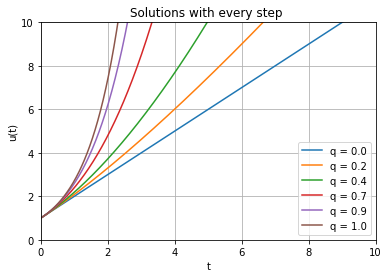

In [42]:
for i in steps:
    
    RK4 = Solution_RK4(Function_first, 1., t, i)
    plt.plot(t,RK4, label = f'q = {i}')
    plt.legend()
    
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()
plt.title("Solutions with every step ")
plt.xlabel("t")
plt.ylabel("u(t)")

## 0.2 Métodos multipaso

In [67]:
t = sym.Symbol("t", real = True)
h = sym.Symbol("h", real = True)

In [68]:
F1 = (t-(-h))*(t-(-2*h))/(2*h**2)
I1 = sym.integrate(F1,(t,0,h))

F2 = -(t-(0))*(t-(-2*h))/(h**2)
I2 = sym.integrate(F2,(t,0,h))

F3 = (t-(-h))*(t-(0))/(2*h**2)
I3 = sym.integrate(F3,(t,0,h))

print("Método de Adams-Bashforth de tres puntos",'\n')

print(f'Coeficiente 1: {I1}','\n',f'Coeficiente 2: {I2}','\n',f'Coeficiente 3: {I3}')

Método de Adams-Bashforth de tres puntos 

Coeficiente 1: 23*h/12 
 Coeficiente 2: -4*h/3 
 Coeficiente 3: 5*h/12


In [69]:
F4 = F1*((t-(-3*h))/(3*h))
I4 = sym.integrate(F4,(t,0,h))

F5 = F2*((t-(-3*h))/(2*h))
I5 = sym.integrate(F5,(t,0,h))

F6 = F3*((t-(-3*h))/(h))
I6 = sym.integrate(F6,(t,0,h))

F7 = -(t-(-2*h))*(t-(-h))*(t-(0))/(6*h**3) 
I7 = sym.integrate(F7,(t,0,h))

print("Método de Adams-Bashforth de cuatro puntos",'\n')

print(f'Coeficiente 1: {I4}','\n',f'Coeficiente 2: {I5}','\n',f'Coeficiente 3: {I6}','\n',f'Coeficiente 4: {I7}')

Método de Adams-Bashforth de cuatro puntos 

Coeficiente 1: 55*h/24 
 Coeficiente 2: -59*h/24 
 Coeficiente 3: 37*h/24 
 Coeficiente 4: -3*h/8


In [70]:
F1b = (t-(0))*(t-(-h))/(2*h**2)
I1b = sym.integrate(F1b,(t,0,h))

F2b = -(t-(h))*(t-(-h))/(h**2)
I2b = sym.integrate(F2b,(t,0,h))

F3b = (t-(0))*(t-(h))/(2*h**2)
I3b = sym.integrate(F3b,(t,0,h))

print("Método de Adams-Moulton de tres puntos",'\n')
print(f'Coeficiente 1: {I1b}','\n',f'Coeficiente 2: {I2b}','\n',f'Coeficiente 3: {I3b}')

Método de Adams-Moulton de tres puntos 

Coeficiente 1: 5*h/12 
 Coeficiente 2: 2*h/3 
 Coeficiente 3: -h/12


In [71]:
F4b = F1b*((t-(-2*h))/(3*h))
I4b = sym.integrate(F4b,(t,0,h))

F5b = F2b* ((t-(-2*h))/(2*h))
I5b = sym.integrate(F5b,(t,0,h))

F6b = F3b*((t-(-2*h))/(h))
I6b = sym.integrate(F6b,(t,0,h))

F7b = -(t-(-h))*(t-(0))*(t-(h))/(6*h**3) 
I7b = sym.integrate(F7b,(t,0,h))

print("Método de Adams-Moulton de cuatro puntos",'\n')
print(f'Coeficiente 1: {I4b}','\n',f'Coeficiente 2: {I5b}','\n',f'Coeficiente 3: {I6b}','\n',f'Coeficiente 3: {I7b}')

Método de Adams-Moulton de cuatro puntos 

Coeficiente 1: 3*h/8 
 Coeficiente 2: 19*h/24 
 Coeficiente 3: -5*h/24 
 Coeficiente 3: h/24


## 0.3  Gravitational N-body problem

In [95]:
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        self.epsilon = 0.1

        self.rp = r0
        self.vp = v0  
        
    def Evolution(self,i):
        
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
    
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.

    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep
    
    def GetForce(self,p):
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2+self.epsilon**2)**(3/2)
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):

        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])


In [96]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    r = 1
    
    for i in range(NParticles):
        
        j = 0
        
        while j < 1:
            
            x = np.random.uniform(-Limit, Limit, size=Dim )
            if (x[0]**2+x[1]**2+x[2]**2) <= r:
                r0 = x
                
                j+=1
                
            else: 
                j=0 
            
            
        v0 = np.array([0.,0.,0.])
        a0 = np.array([0.,0.,0.])
        
        p = Particle(r0,v0,a0,t,0.01,0.3,i)
        
        Particles_.append(p)        
        
    return Particles_

In [97]:
Limits = np.array([1.,1.,1.]) 

In [98]:
def RunSimulation(t,NParticles = 10, Velo = 6):    

    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
        
    return Particles

In [99]:
dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)

In [100]:
Particles = RunSimulation(t,100,Velo = 20)

100%|██████████| 2001/2001 [03:12<00:00, 10.37it/s]


In [101]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 
    
AngularMomentum = Particles[0].GetAngularMomentumVector()
for i in range(1,len(Particles)):
    AngularMomentum = np.add(AngularMomentum, Particles[i].GetAngularMomentumVector())

<IPython.core.display.Javascript object>


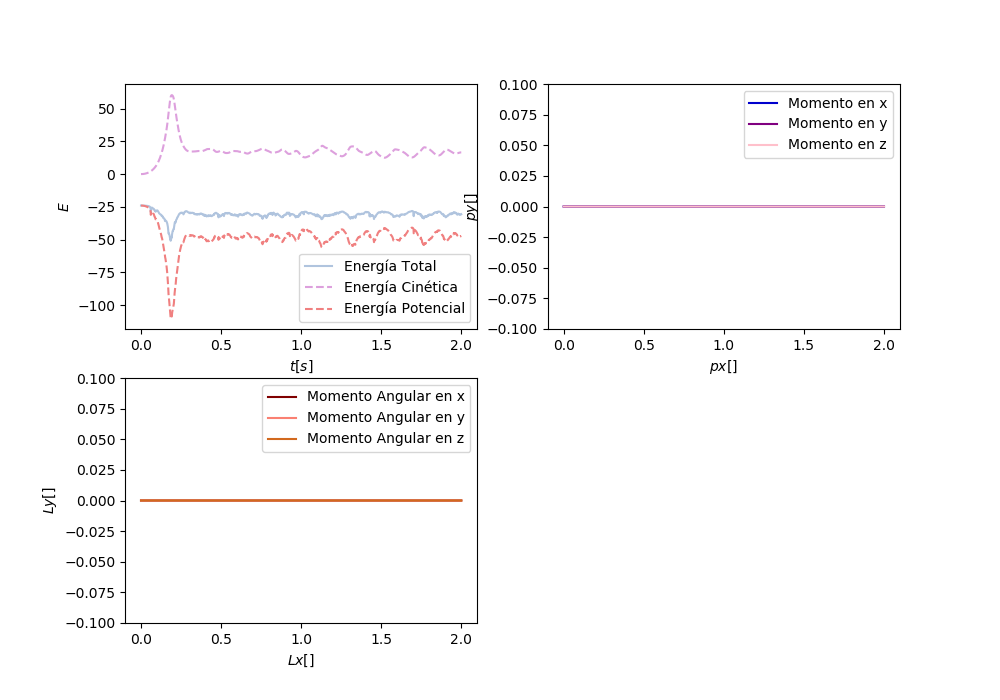

In [110]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

ax1.plot(t,EnergiaTotal, c = "lightsteelblue", label='Energía Total')
ax1.plot(t,EnergiaK,'--', c = "plum",label='Energía Cinética')
ax1.plot(t,EnergiaP,'--', c = "lightcoral",label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], c = "mediumblue", label='Momento en x')
ax2.plot(t,Momentum[:,1], c = "purple", label='Momento en y')
ax2.plot(t,Momentum[:,2], c = 'pink', label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

ax3.plot(t,AngularMomentum[:,0], c = 'maroon', label='Momento Angular en x')
ax3.plot(t,AngularMomentum[:,1], c = 'salmon', label='Momento Angular en y')
ax3.plot(t,AngularMomentum[:,2], c = 'chocolate', label='Momento Angular en z')
ax3.set_xlabel(r'$Lx[]$',fontsize=10)
ax3.set_ylabel(r'$Ly[]$',fontsize=10)
ax3.legend(loc=0)
ax3.set_ylim(-0.1,0.1)

plt.show()

In [111]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [112]:
redt = ReduceTime(t,100)

<IPython.core.display.Javascript object>


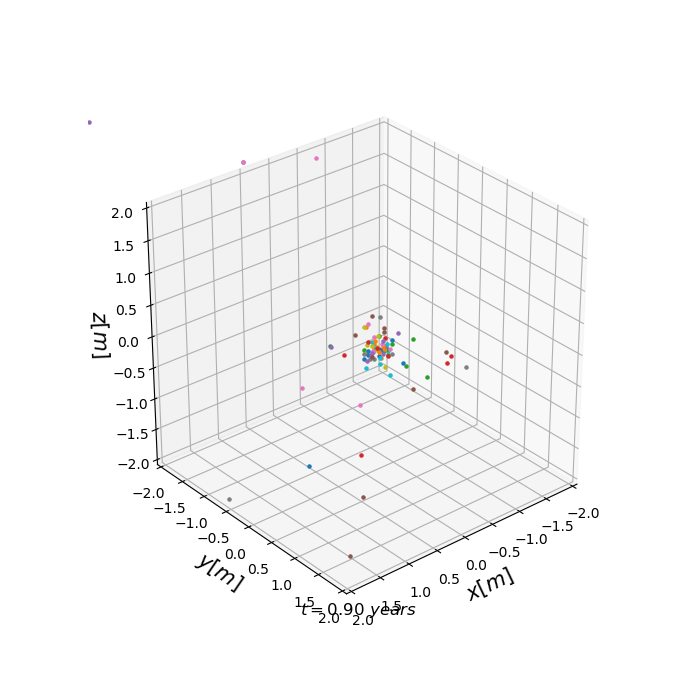

In [113]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)
    
def Update(i):
    
    plot = ax.clear()
    init()
    
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        plot = ax.scatter(x,y,z,marker='.')
                    
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

## 0.4 4-order simplectic integrator (Yoshida)

In [73]:
TMax = 10.
TMin = 0.
N = 201

In [74]:
h = (TMax-TMin)/float(N-1)
t = np.linspace(TMin, TMax, N)

In [75]:
r_initial = np.array([1.0,0])

In [76]:
def Principal_function(x):
    return -x

In [77]:
def LeapFrog_Method(r_initial, t):
    
    N = len(t)
    h = t[1] - t[0]
    
    n = 0.5
    
    t_initial = np.arange(TMin - n*h, TMax - n*h + h, h)
    
    position = np.zeros(N)
    velocity = np.zeros(N)

    position[0] = r_initial[0]
    velocity[0] = r_initial[1] - n*h*Principal_function(position[0])
    
    for i in range(1,N):
        
        velocity[i] = velocity[i-1] + h*Principal_function(position[i-1])
        position[i] = position[i-1] + h*velocity[i]
    

    X = np.array([])
    V = velocity[1:]
    
    Range = len(position)
    
    for i in range(Range-1):
        X = np.append(X,(position[i]+position[i+1])*n)
    
    return X,V

In [78]:
position, velocity = LeapFrog_Method(r_initial,t)

In [79]:
n = 0.5

Kinectic_Energy = []
for i in velocity:
    Kinectic_Energy.append(n*i**2)

Potencial_Energy = []
for j in position:
    Potencial_Energy.append(n*j**2)

Mechanical_Energy = []
for k in range(len(Potencial_Energy)):
    Mechanical_Energy.append(Potencial_Energy[k]+Kinectic_Energy[k])

In [80]:
def Function_second(v):
    return v

In [81]:
def Solution_RKA(t_inicial,t_final,h):
    
    N = int((t_final - t_inicial)/ h) + 1
    t = np.linspace(t_inicial, t_final, N)
    
    position = np.zeros(N)
    velocity = np.zeros(N)
    
    position[0] = 1
    velocity[0] = 0
    
    
    Ki = np.zeros(2)
    Kj = np.zeros(2)
    Kk = np.zeros(2)
    Kl = np.zeros(2)
    
    for i in tqdm(range(1, N)):
         
        n = 0.5
        
        previous_velocity = velocity[i-1]
        previous_position = position[i-1]

        Ki[0] = h*Function_second(previous_velocity)
        Ki[1] = h*Principal_function(previous_position)
        
        Kj[0] = h*Function_second(previous_velocity + n*Ki[1])
        Kj[1] = h*Principal_function(previous_position + n*Ki[0])
        
        Kk[0] = h*Function_second(previous_velocity + n*Kj[1])
        Kk[1] = h*Principal_function(previous_position + n*Kj[0])
        
        Kl[0] = h*Function_second(previous_velocity + Kk[1])
        Kl[1] = h*Principal_function(previous_position + Kk[0])

        position[i] = previous_position+(Ki[0]+2*Kj[0]+2*Kk[0]+Kl[0])/6
        velocity[i] = previous_velocity+(Ki[1]+2*Kj[1]+2*Kk[1]+Kl[1])/6

    return t, position, velocity

In [82]:
time2, position2, velocity2 = Solution_RKA(0, 10, 0.01)

100%|██████████| 1000/1000 [00:00<00:00, 58024.54it/s]


In [83]:
n = 0.5

Kinectic_Energy2 = []
for i in velocity2:
    Kinectic_Energy2.append(n*i**2)

Potencial_Energy2 = []
for j in position2:
    Potencial_Energy2.append(n*j**2)

Mechanical_Energy2 = []
for k in range(len(Potencial_Energy2)):
    Mechanical_Energy2.append(Potencial_Energy2[k]+Kinectic_Energy2[k])

<IPython.core.display.Javascript object>


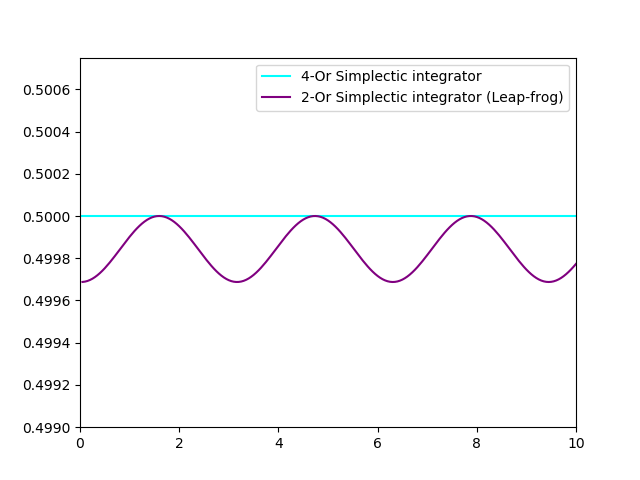

In [84]:
plt.plot(time2,Mechanical_Energy2, 'k',label='4-Or Simplectic integrator', color ="cyan")
plt.plot(t[1:],Mechanical_Energy, 'y',label='2-Or Simplectic integrator (Leap-frog)', color="purple")
plt.legend(loc=0)
plt.xlim(0,10)
plt.ylim(0.4990,0.50075)
plt.show()